# Graph Plotting

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../datasets/train.csv')

In [3]:
nominal_null_values = {'Alley': 'NA'}
df.fillna(value=nominal_null_values, inplace=True)

In [4]:
sns.set(font_scale=2)
sns.set_style("whitegrid")

<AxesSubplot:xlabel='count', ylabel='Electrical'>

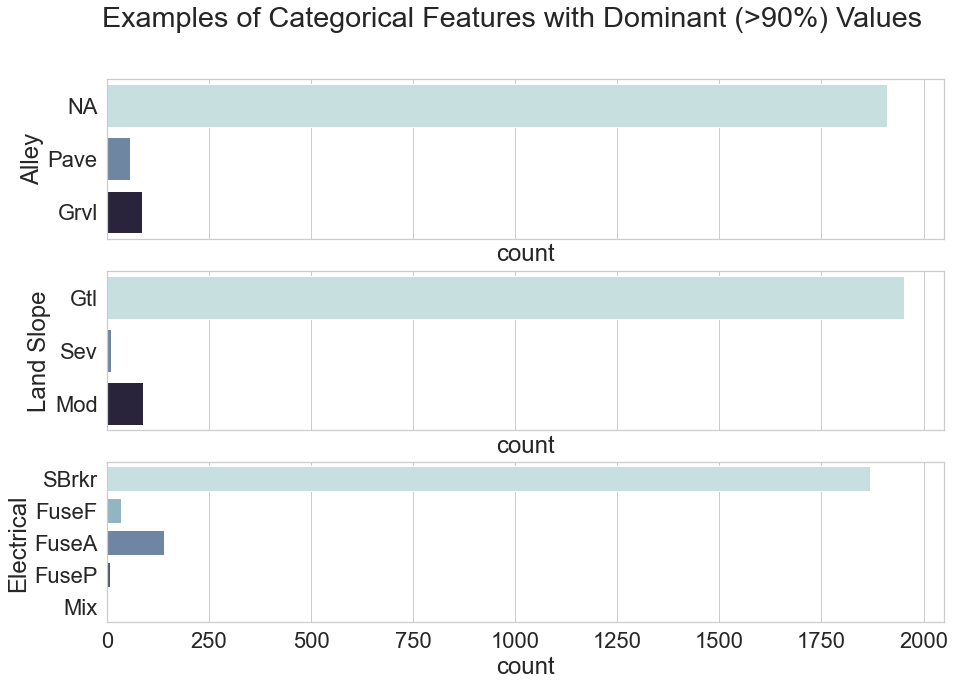

In [5]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10), sharex=True)
fig.suptitle('Examples of Categorical Features with Dominant (>90%) Values')

sns.countplot(ax = axes[0], y="Alley", palette="ch:start=.2,rot=-.3", data=df)
sns.countplot(ax = axes[1], y="Land Slope", palette="ch:start=.2,rot=-.3", data=df)
sns.countplot(ax = axes[2], y="Electrical", palette="ch:start=.2,rot=-.3", data=df)

In [6]:
discrete_null_values = {'Garage Cars': 0,
                       'Garage Yr Blt': df['Garage Yr Blt'].mean()}
df.fillna(value=discrete_null_values, inplace=True)

In [7]:
corr_df = df[['Year Built', 'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd', 'Garage Yr Blt', 'Garage Cars']].copy()
corr_df['SalePrice'] = df['SalePrice']

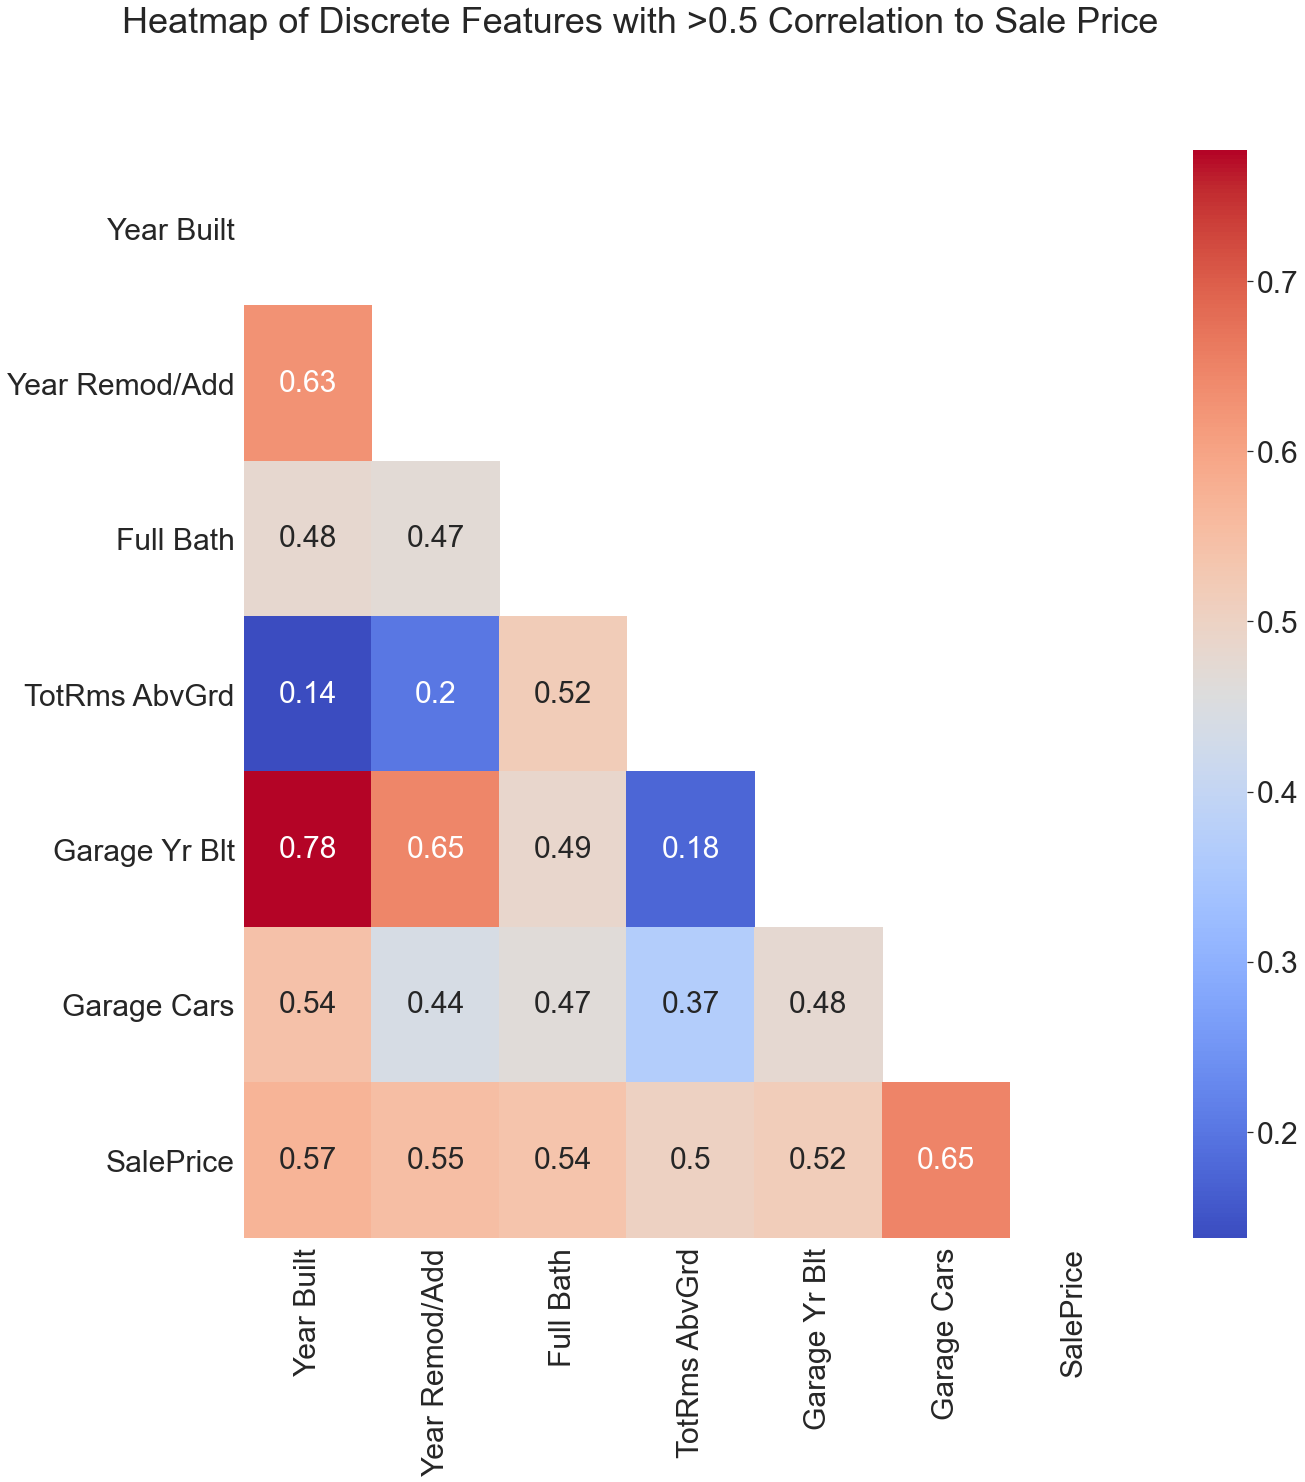

In [8]:
plt.figure(figsize=(20,20))
plt.rcParams.update({'font.size': 30})
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.suptitle('Heatmap of Discrete Features with >0.5 Correlation to Sale Price', x=0.4)
mask = np.triu(np.ones_like(corr_df.corr(), dtype=bool))
sns.heatmap(corr_df.corr().abs(), cmap='coolwarm', mask=mask, annot=True);